In [33]:
from src.fem_1d_eigen import *
import importlib
import src.fem_1d_eigen
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

importlib.reload(src.fem_1d_eigen)

In [36]:
xs = np.linspace(0, 1, 100)
v = np.ones_like(xs)
femeig = Fem1dEigen(xs, v)
K = femeig.get_K()
M = femeig.get_M()
V = femeig.get_V()
K_dirichlet = K[1:-1, 1:-1]
M_dirichlet = M[1:-1, 1:-1]
V_dirichlet = V[1:-1, 1:-1]
k = 3
val, vec = eigsh(K_dirichlet + V_dirichlet, k=k,
                 M=M_dirichlet, which="LA", sigma=0)

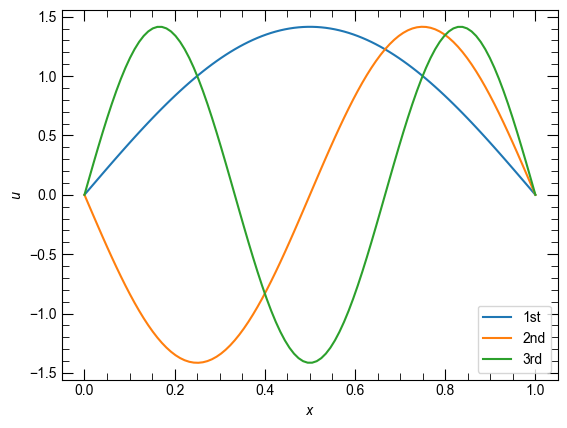

In [37]:
vec_0 = np.insert(vec, 0, 0, axis=0)
vec_0_m1 = np.insert(vec_0, vec_0.shape[0], 0, axis=0)
fig, ax = plt.subplots()
ax.plot(xs, vec_0_m1[:, 0], label="1st")
ax.plot(xs, vec_0_m1[:, 1], label="2nd")
ax.plot(xs, vec_0_m1[:, 2], label="3rd")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")
fig.savefig("eigenfunction.pdf")

In [38]:
vals = []
part1 = np.arange(10, 100, 10)
part2 = np.arange(100, 1000, 100)
combined = np.concatenate((part1, part2))
for i in combined:
    print(i)
    xs = np.linspace(0, 1, i)
    v = np.zeros_like(xs)
    femeig = Fem1dEigen(xs, v)
    K = femeig.get_K()
    M = femeig.get_M()
    V = femeig.get_V()
    K_dirichlet = K[1:-1, 1:-1]
    M_dirichlet = M[1:-1, 1:-1]
    V_dirichlet = V[1:-1, 1:-1]
    val, vec = eigsh(K_dirichlet+V_dirichlet, k=1,
                     M=M_dirichlet, which="LM", sigma=0)
    vals.append(val)

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900


[-1.01765583e-06]


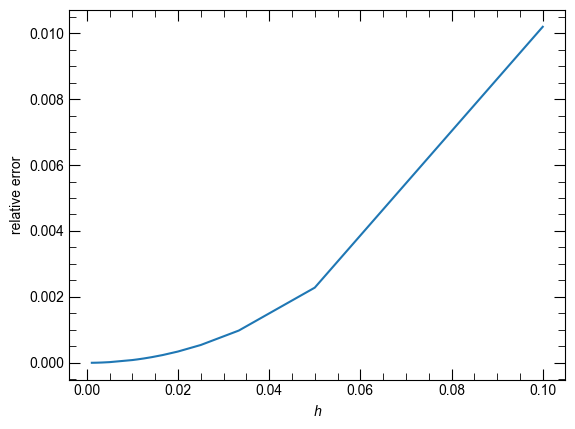

In [39]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.abs(np.pi**2 - np.array(vals)) / (np.pi**2))
ax.set_xlabel("$h$")
ax.set_ylabel("relative error")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("convergence.pdf")

[-1.01765583e-06]


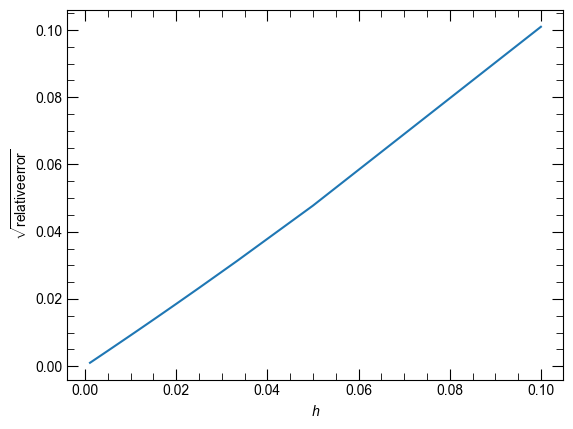

In [ ]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.sqrt(np.abs(np.pi**2 - np.array(vals)) / (np.pi**2)))
ax.set_xlabel("$h$")
ax.set_ylabel(r"$\sqrt{\mathrm{relative error}}$")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("convergence_sqrt.pdf")